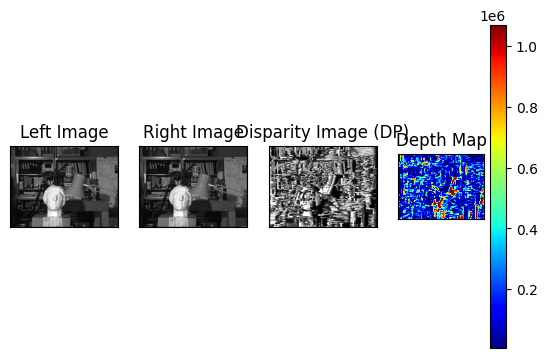

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def compute_disparity_dp(imgL, imgR, max_disparity, P1, P2):
    height, width = imgL.shape
    disparity_map = np.zeros((height, width), dtype=np.float32)

    # Cost volume initialization
    cost_volume = np.zeros((height, width, max_disparity), dtype=np.float32)

    for d in range(max_disparity):
        shifted_R = np.roll(imgR, -d, axis=1)
        if d > 0:
            shifted_R[:, -d:] = 0
        cost_volume[:, :, d] = np.abs(imgL - shifted_R)

    # Accumulated cost initialization
    acc_cost = np.zeros((height, width, max_disparity), dtype=np.float32)
    acc_cost[:, 0, :] = cost_volume[:, 0, :]

    # Dynamic programming to accumulate cost
    for x in range(1, width):
        for d in range(max_disparity):
            min_cost = acc_cost[:, x-1, d]
            if d > 0:
                min_cost = np.minimum(min_cost, acc_cost[:, x-1, d-1] + P1)
            if d < max_disparity - 1:
                min_cost = np.minimum(min_cost, acc_cost[:, x-1, d+1] + P1)
            min_cost = np.minimum(min_cost, acc_cost[:, x-1, :].min(axis=1) + P2)
            acc_cost[:, x, d] = cost_volume[:, x, d] + min_cost

    # Find disparity by selecting minimum accumulated cost
    disparity_map = np.argmin(acc_cost, axis=2).astype(np.float32)

    return disparity_map

def compute_depth(disparity_map, focal_length, baseline):
    # Avoid division by zero by setting a minimum disparity value
    min_disparity = 0.1
    disparity_map[disparity_map == 0] = min_disparity
    depth_map = (focal_length * baseline) / disparity_map
    return depth_map

# Load the images
imgL = cv2.imread('/content/drive/MyDrive/tsukuba_l.png', 0)
imgR = cv2.imread('/content/drive/MyDrive/tsukuba_r.png', 0)

# Parameters
max_disparity = 16
focal_length = 615.0  # in pixels
baseline = 174.0      # in mm
P1 = 8
P2 = 32

# Compute disparity using DP
disparity_dp = compute_disparity_dp(imgL, imgR, max_disparity, P1, P2)

# Compute depth map
depth_map = compute_depth(disparity_dp, focal_length, baseline)

# Display the images
plt.subplot(1, 4, 1)
plt.imshow(imgL, cmap='gray')
plt.xticks([]), plt.yticks([]), plt.title('Left Image')

plt.subplot(1, 4, 2)
plt.imshow(imgR, cmap='gray')
plt.xticks([]), plt.yticks([]), plt.title('Right Image')

plt.subplot(1, 4, 3)
plt.imshow(disparity_dp, cmap='gray')
plt.xticks([]), plt.yticks([]), plt.title('Disparity Image (DP)')

plt.subplot(1, 4, 4)
plt.imshow(depth_map, cmap='jet')
plt.colorbar(), plt.xticks([]), plt.yticks([]), plt.title('Depth Map')

plt.show()


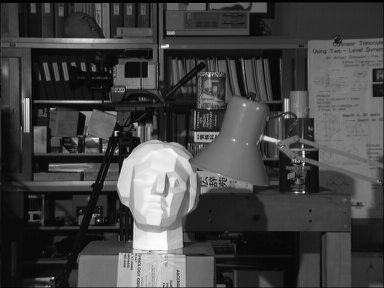

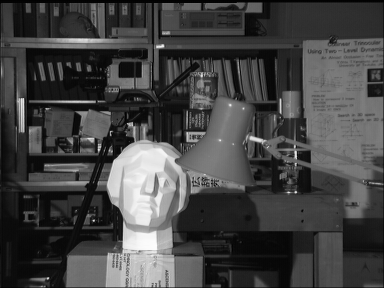

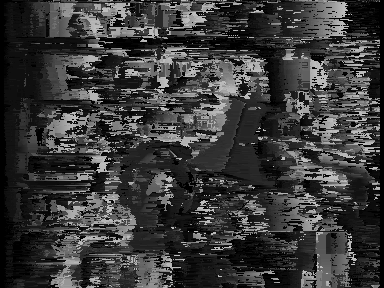

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def compute_disparity_map(left_img, right_img, max_disparity, block_size):
    height, width = left_img.shape
    disparity_map = np.zeros((height, width), np.uint8)

    # Cost matrix
    cost = np.zeros((height, width, max_disparity))

    for d in range(max_disparity):
        right_shifted = np.roll(right_img, d, axis=1)
        abs_diff = np.abs(left_img - right_shifted)
        abs_diff[:, :d] = 255
        cost[:, :, d] = abs_diff

    for y in range(height):
        for x in range(width):
            if x < block_size // 2 or x >= width - block_size // 2:
                continue
            min_cost = float('inf')
            min_d = 0
            for d in range(max_disparity):
                cost_block = cost[y, x - block_size // 2:x + block_size // 2 + 1, d].sum()
                if cost_block < min_cost:
                    min_cost = cost_block
                    min_d = d
            disparity_map[y, x] = min_d * (255 // max_disparity)

    return disparity_map

left_img = cv2.imread('/content/drive/MyDrive/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('/content/drive/MyDrive/tsukuba_r.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(left_img)
cv2_imshow(right_img)
max_disparity = 64
block_size = 9

disparity_map = compute_disparity_map(left_img, right_img, max_disparity, block_size)

cv2_imshow(disparity_map)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


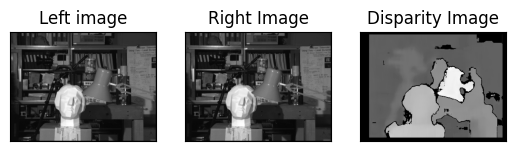

In [14]:
import numpy as пр
import cv2
from matplotlib import pyplot as plt
import math
imgL = cv2.imread ('/content/drive/MyDrive/tsukuba_l.png', 0)
imgR = cv2.imread ('/content/drive/MyDrive/tsukuba_r.png', 0)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=19)
disparity = stereo. compute (imgL, imgR)
plt.subplot (1,3,1),plt.imshow(imgL, 'gray')
plt.xticks([]),plt.yticks([]),plt.title('Left image')
plt.subplot (1,3,2),plt.imshow(imgR, "gray")
plt.xticks([]),plt.yticks([]) ,plt.title('Right Image')
plt.subplot(1,3,3),plt.imshow (disparity, 'gray')
plt.xticks ([]),plt.yticks ([]),plt.title('Disparity Image')
plt.show ()

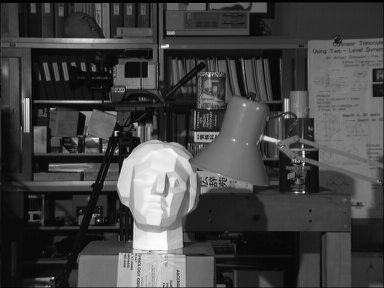

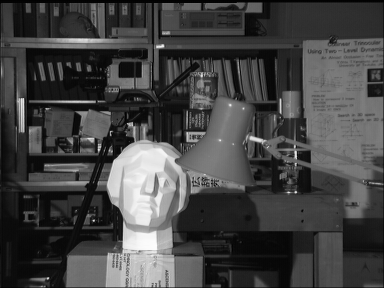

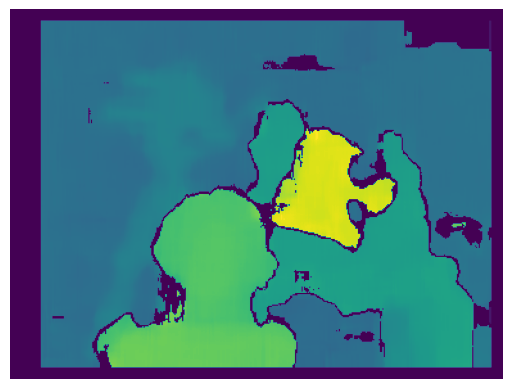

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
left_image=cv.imread('/content/drive/MyDrive/tsukuba_l.png',cv.IMREAD_GRAYSCALE)
right_image=cv.imread('/content/drive/MyDrive/tsukuba_r.png',cv.IMREAD_GRAYSCALE)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=19)
depth= stereo.compute(left_image,right_image)
cv2_imshow(left_image)
cv2_imshow(right_image)
plt.imshow(depth)
plt.axis('off')
plt.show()
